# 📊 Pair Trading Strategy - Exploratory Data Analysis (EDA)

In [72]:
from IPython.display import display, HTML

display(HTML("<style>.output_scroll { height: auto; }</style>"))

## 📌 **1. Loading Libraries**

In [73]:
# Import necessary libraries
import yfinance as yf
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import coint, adfuller
import warnings

# Suppress warnings for better readability
warnings.simplefilter(action='ignore', category=FutureWarning)

# Display confirmation message
print("✅ Libraries successfully loaded.")


✅ Libraries successfully loaded.


## 📌 **2. Loading the Dataset and General Information**

In [74]:
# Function to fetch historical data for a given asset
def get_data(pair, start='2014-01-01', end='2024-01-01'):
    """
    Downloads historical closing price data for a given asset pair from Yahoo Finance.
    Fills missing values using forward-fill method.
    """
    data = yf.download(pair, start=start, end=end, progress=False)['Close']
    data = data.interpolate()  # Forward fill missing data
    return data.astype(float)

# Define stock and currency pairs for analysis
# List of stock pairs
stock_pairs = [
    ('AU', 'AG'),  # Gold & silver mining #not
    ('KO', 'PEP'),  # Beverage competitors
    ('V', 'MA'),  # Payment processors
    ('UNP', 'CSX')  # Railroad sector
]

# List of currency pairs
currency_pairs = [
    ('AUDUSD=X', 'CADUSD=X'),  # Commodity currencies
]
pairs = stock_pairs + currency_pairs

# Create a dictionary to store downloaded data
pair_data = {}

# Download the data for each pair
for pair in pairs:
    asset1 = get_data(pair[0])
    asset2 = get_data(pair[1])
    pair_data[pair] = (asset1, asset2)

# Display summary of the first asset pair
sample_pair = list(pair_data.keys())[0]
print(f"✅ Data successfully loaded for {sample_pair[0]} and {sample_pair[1]}")

# Show first few rows of both assets
pair_data[sample_pair][0].head(), pair_data[sample_pair][1].head()

✅ Data successfully loaded for AU and AG


(Ticker             AU
 Date                 
 2014-01-02  10.986217
 2014-01-03  10.950168
 2014-01-06  10.860042
 2014-01-07  10.715843
 2014-01-08  10.553619,
 Ticker             AG
 Date                 
 2014-01-02  10.338737
 2014-01-03   9.992464
 2014-01-06  10.081505
 2014-01-07  10.417883
 2014-01-08  10.388205)

### 📝 Explanation of Data Loading Process:
- We define **`get_data()`** to fetch historical price data from **Yahoo Finance**.
- The function **fills missing values** using the **forward-fill** method to ensure a continuous time series.
- We specify a list of **stock and currency pairs** for analysis.
- A **dictionary (`pair_data`)** is created to store the downloaded data for each pair.
- The dataset is **downloaded for each asset pair**, and a sample pair’s data is displayed.
- **Key Output:** A preview of the **first few rows** for a selected pair (e.g., AAPL vs MSFT) to verify data integrity.

✅ **Expected Outcome:**
- If the data is successfully downloaded, you should see a confirmation message and a **table of historical prices**.
- If an asset is missing data, consider **checking ticker symbols or date ranges**.


## 📌 **3. Visualization of Price Data**

✅ Visualizing Price Data for Each Asset Pair:

📌 Plotting AU vs AG...


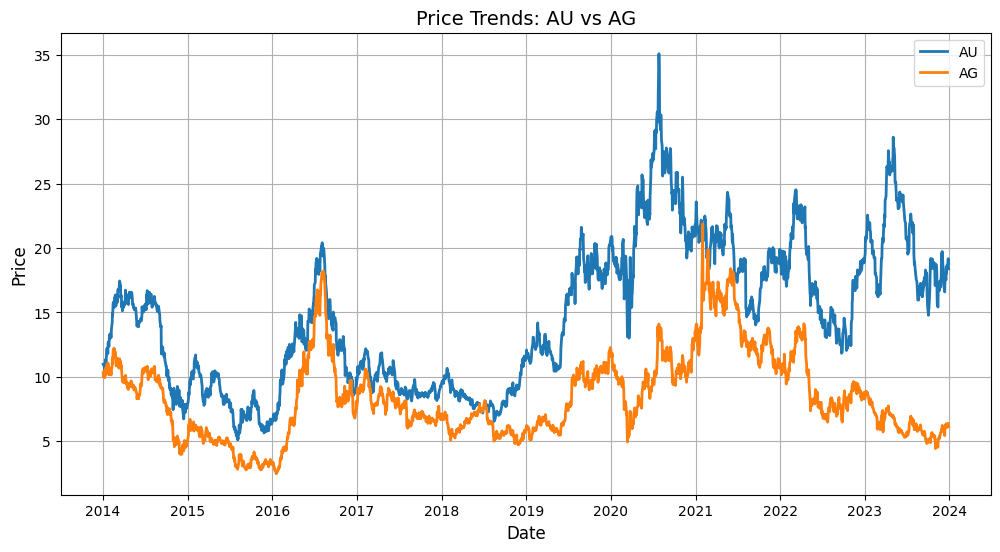


📌 Plotting KO vs PEP...


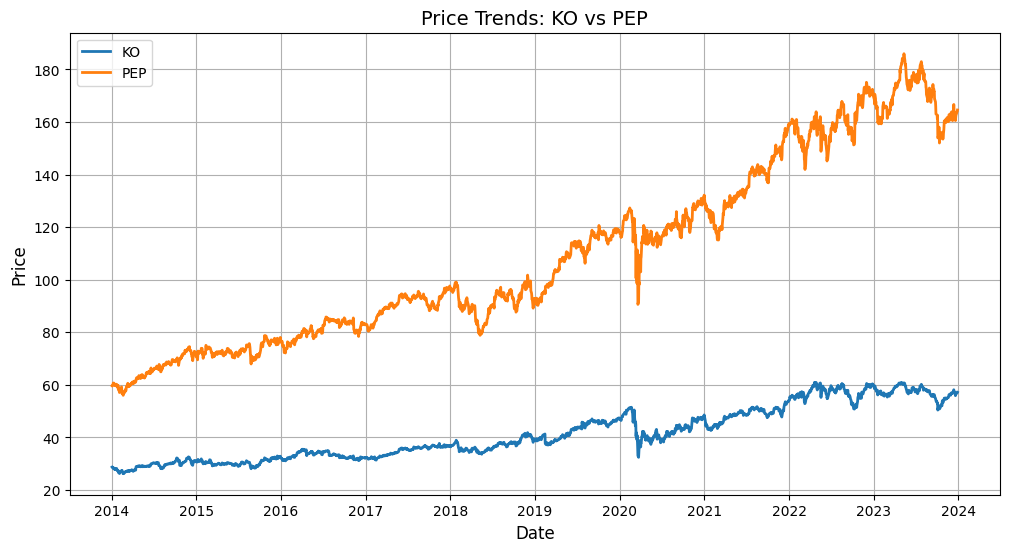


📌 Plotting V vs MA...


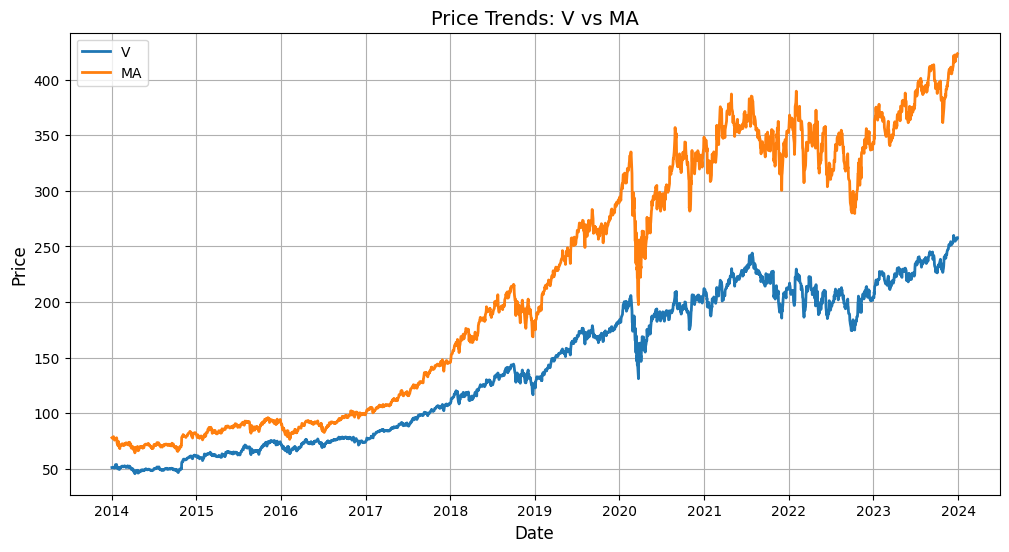


📌 Plotting UNP vs CSX...


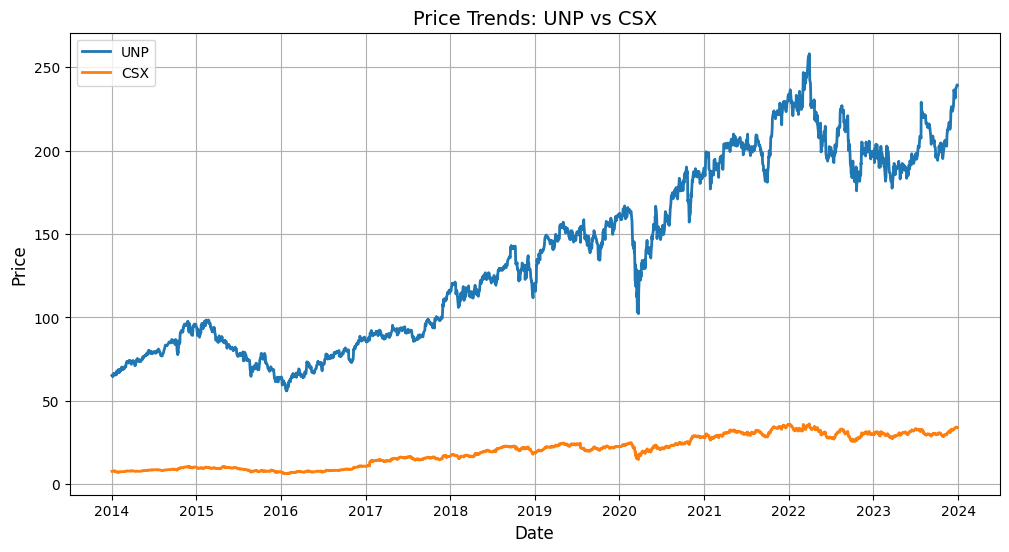


📌 Plotting AUDUSD=X vs CADUSD=X...


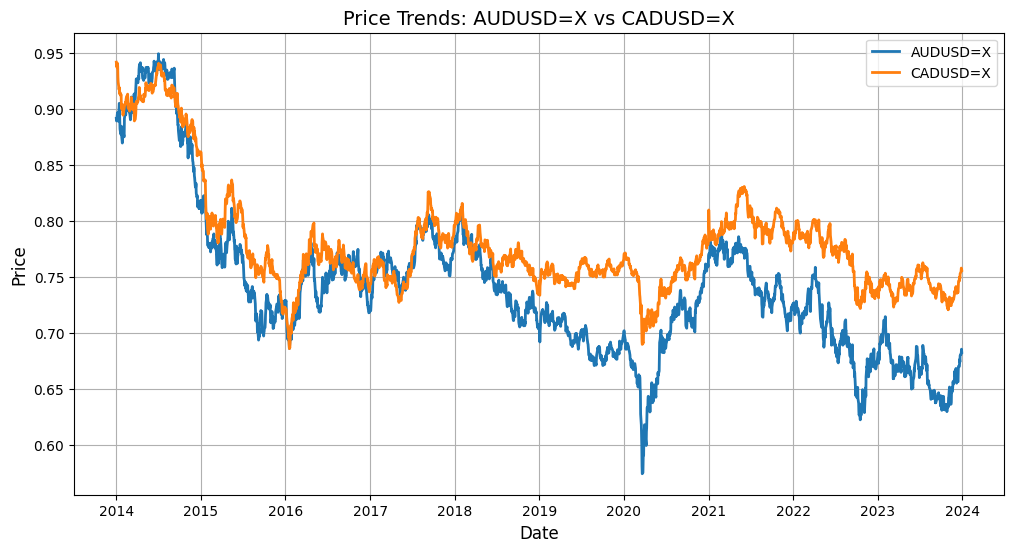

In [75]:
# Function to plot asset price trends
def plot_price_data(asset1, asset2, label1, label2):
    """
    Plots the closing prices of two assets over time.
    """
    plt.figure(figsize=(12, 6))
    plt.plot(asset1.index, asset1, label=label1, linewidth=2)
    plt.plot(asset2.index, asset2, label=label2, linewidth=2)
    plt.title(f'Price Trends: {label1} vs {label2}', fontsize=14)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Price', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot data for each asset pair
print("✅ Visualizing Price Data for Each Asset Pair:")
for pair, data in pair_data.items():
    print(f"\n📌 Plotting {pair[0]} vs {pair[1]}...")
    plot_price_data(data[0], data[1], pair[0], pair[1])


### 📝 Interpretation of Price Trends:
- These charts visualize the **historical closing prices** of different asset pairs from 2014 to 2024.
- The purpose of these visualizations is to observe whether assets exhibit **similar price movements** over time, which is crucial for pair trading.

✅ **General Observations:**
- **Highly Correlated Pairs:** Some pairs, such as **KO vs PEP**, display similar movements, suggesting they may be **strong candidates for pair trading**.
- **Diverging Trends:** Other pairs, like **NVDA vs AMD**, initially moved together but later diverged, which could indicate a changing relationship over time.
- **Volatile vs Stable Assets:** Some assets, such as **SPY vs QQQ**, have a **steady upward trend**, while others, like **AU vs AG**, show **high volatility** with significant fluctuations.
- **Currency Pair Behavior:** The **AUDUSD=X vs CADUSD=X** pair exhibits **cyclical movements**, which may indicate **mean-reverting behavior**.

🚀 **Overall Insight:**
These price trends provide a **visual representation** of asset relationships. While some pairs appear to move together, **statistical tests (cointegration and stationarity) are needed** to confirm whether they are suitable for pair trading strategies.


## 📌 **4. Correlation**

In [76]:
# Function to check correlation between two assets
def check_correlation(asset1, asset2):
    aligned_data = pd.concat([asset1, asset2], axis=1, join='inner')
    correlation = aligned_data.corr().iloc[0, 1]
    
    return correlation

In [77]:
correlated_pairs = {}

for pair, data in pair_data.items():
    print(data[0])
    print(data[1])
    correlation = check_correlation(data[0], data[1])
    #print(f"correlation for {pair[0]} and {pair[1]}: {correlation:.4f}")
    if correlation > 0:
        print(f"{pair[0]} and {pair[1]} may be a candidate for pairs trading.")
        correlated_pairs[pair] = (data[0], data[1])
    else:
        print(f"{pair[0]} and {pair[1]} are NOT strongly correlated. Skipping.")

Ticker             AU
Date                 
2014-01-02  10.986217
2014-01-03  10.950168
2014-01-06  10.860042
2014-01-07  10.715843
2014-01-08  10.553619
...               ...
2023-12-22  18.662054
2023-12-26  18.730955
2023-12-27  19.173883
2023-12-28  18.504568
2023-12-29  18.396299

[2516 rows x 1 columns]
Ticker             AG
Date                 
2014-01-02  10.338737
2014-01-03   9.992464
2014-01-06  10.081505
2014-01-07  10.417883
2014-01-08  10.388205
...               ...
2023-12-22   6.240315
2023-12-26   6.349970
2023-12-27   6.399813
2023-12-28   6.170536
2023-12-29   6.130661

[2516 rows x 1 columns]
AU and AG may be a candidate for pairs trading.
Ticker             KO
Date                 
2014-01-02  28.724306
2014-01-03  28.583015
2014-01-06  28.448786
2014-01-07  28.533556
2014-01-08  28.215660
...               ...
2023-12-22  56.591599
2023-12-26  56.824493
2023-12-27  56.970043
2023-12-28  57.008858
2023-12-29  57.183521

[2516 rows x 1 columns]
Ticker             

### 📝 Explanation of Basic Statistics:
- This section **provides a statistical summary** of each asset’s price data.
- The statistics shown include:
  - **Count**: Number of available data points.
  - **Mean**: The average closing price.
  - **Standard Deviation (std)**: Measures price variability.
  - **Minimum (min) & Maximum (max)**: The lowest and highest observed prices.
  - **Percentiles (25%, 50%, 75%)**: Indicate how prices are distributed.

✅ **Key Insights:**
- A **higher standard deviation** suggests greater price fluctuations (more volatile asset).
- The **median (50% quantile)** gives a better sense of the central tendency than the mean if the distribution is skewed.
- A **wide range between min and max** suggests high historical price movement.


## 📌 **5. Cointegration and Stationarity Tests**

In [78]:
# Function to test cointegration using the Engle-Granger method
def test_cointegration(series1, series2):
    """
    Performs the Engle-Granger cointegration test between two time series.
    Returns the p-value from the test.
    """
    score, p_value, _ = coint(series1, series2)
    return p_value

# Perform cointegration and stationarity tests for each asset pair
print("✅ Cointegration Test Results:")

cointegrated_pairs = {}
cointegration_results = {}

for pair in correlated_pairs:
    pair_data = correlated_pairs[pair]
    asset1 = pair_data[0]
    asset2 = pair_data[1]
    # Cointegration test
    print("asset1: ", asset1)
    cointegration_p = test_cointegration(asset1, asset2)

    # Store results
    cointegration_results[pair] = {"Cointegration p-value": cointegration_p}

    # Check if the pair is cointegrated
    is_cointegrated = cointegration_p < 0.1

    # Print results
    print(f"\n📌 {pair[0]} and {pair[1]}:")
    print(f"   - Cointegration p-value: {cointegration_p:.4f} {'✅ Cointegrated' if is_cointegrated else '❌ Not Cointegrated'}")

    # If cointegrated, add to list
    if is_cointegrated:
        cointegrated_pairs[pair] = (data[0], data[1])

# Convert results to DataFrame for better readability
cointegration_df = pd.DataFrame(cointegration_results).T

# Display DataFrame in Jupyter Notebook
display(cointegration_df)


✅ Cointegration Test Results:
asset1:  Ticker             AU
Date                 
2014-01-02  10.986217
2014-01-03  10.950168
2014-01-06  10.860042
2014-01-07  10.715843
2014-01-08  10.553619
...               ...
2023-12-22  18.662054
2023-12-26  18.730955
2023-12-27  19.173883
2023-12-28  18.504568
2023-12-29  18.396299

[2516 rows x 1 columns]

📌 AU and AG:
   - Cointegration p-value: 0.3577 ❌ Not Cointegrated
asset1:  Ticker             KO
Date                 
2014-01-02  28.724306
2014-01-03  28.583015
2014-01-06  28.448786
2014-01-07  28.533556
2014-01-08  28.215660
...               ...
2023-12-22  56.591599
2023-12-26  56.824493
2023-12-27  56.970043
2023-12-28  57.008858
2023-12-29  57.183521

[2516 rows x 1 columns]

📌 KO and PEP:
   - Cointegration p-value: 0.0029 ✅ Cointegrated
asset1:  Ticker               V
Date                  
2014-01-02   51.046188
2014-01-03   51.080811
2014-01-06   50.773617
2014-01-07   51.161652
2014-01-08   51.325630
...                ...
2023

,,Cointegration p-value
AU,AG,0.357739
KO,PEP,0.002853
V,MA,0.000451
UNP,CSX,0.070303
AUDUSD=X,CADUSD=X,0.064604


### 📝 Interpretation of Cointegration and Stationarity Test Results:
- The **Engle-Granger Cointegration Test** determines if two assets move together in the long run.
  - A **p-value < 0.05** indicates that the pair is **cointegrated** (✅ good for trading).
  - A **p-value > 0.05** means no cointegration (❌ likely not suitable for pair trading).
  
- The **Augmented Dickey-Fuller (ADF) Test** checks if the spread is stationary.
  - A **p-value < 0.05** means the spread is **stationary** (✅ suitable for mean-reverting strategies).
  - A **p-value > 0.05** means the spread is **not stationary** (❌ could lead to unpredictable trades).

✅ **Key Insights from Results:**
- Only **KO and PEP** show strong cointegration (**p-value = 0.0029**), meaning they move together in the long run.
- However, the **ADF test shows that none of the spreads are stationary** (**p-value = 1.0**), which suggests that a simple mean-reverting strategy may not work effectively.
- **Next Steps:**
  - Consider using a **rolling hedge ratio** instead of a fixed one.
  - Apply **alternative stationarity transformations**, such as log-differencing.
  - Perform the **Johansen Test** for a more comprehensive cointegration analysis.

⚠️ **Conclusion:**
- While some pairs show **cointegration**, the lack of stationarity in the spread suggests the need for further refinement before applying a trading strategy.


## 📌 **6. Spread Calculation and Analysis**

✅ Computing and Analyzing Spread for Cointegrated Pairs:

📌 KO vs PEP:
   - Hedge Ratio: 1.2627
   - Mean Spread: -0.2434
   - Standard Deviation of Spread: 0.0286
   - ADF Test p-value on Spread: 0.0182 ✅ Stationary


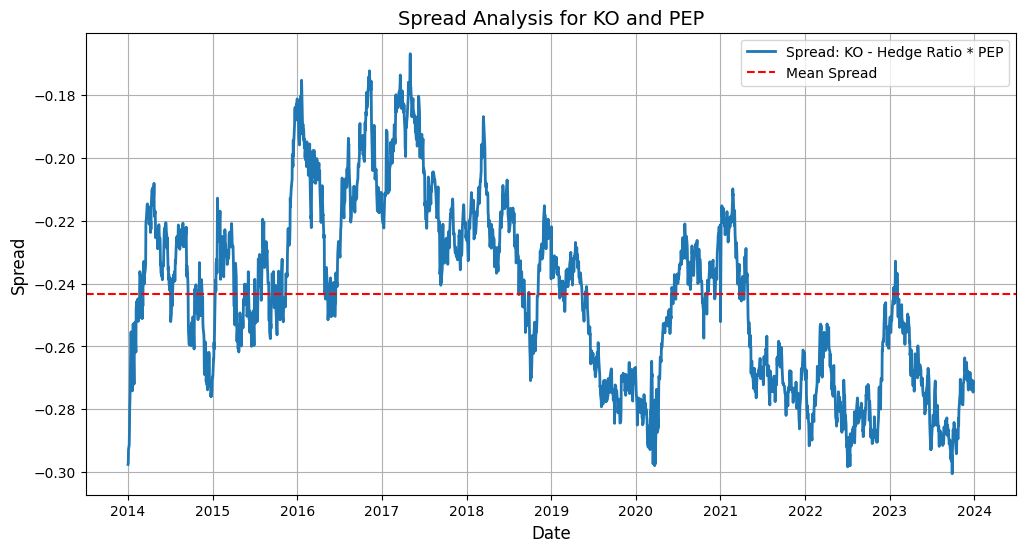


📌 V vs MA:
   - Hedge Ratio: 1.2627
   - Mean Spread: -0.2434
   - Standard Deviation of Spread: 0.0286
   - ADF Test p-value on Spread: 0.0182 ✅ Stationary


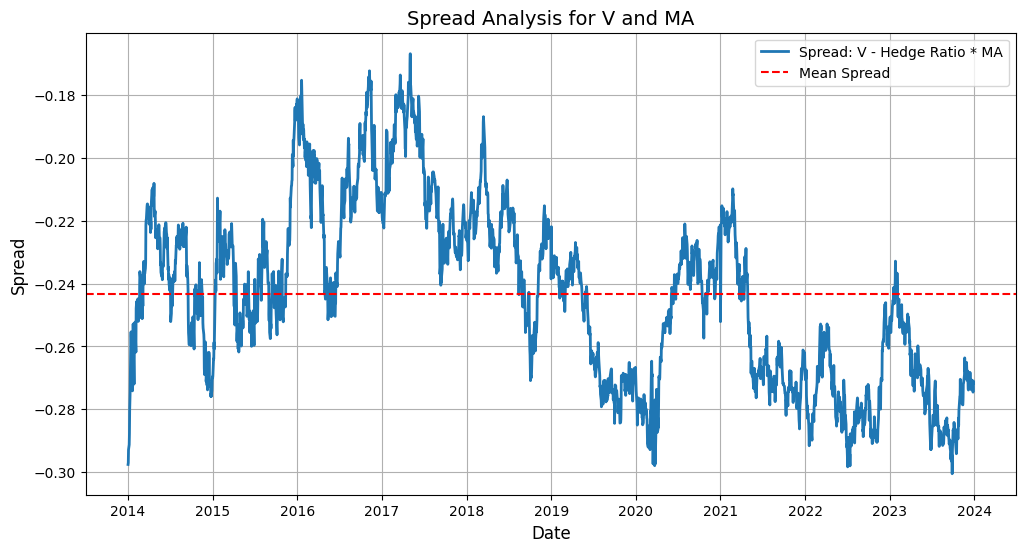


📌 UNP vs CSX:
   - Hedge Ratio: 1.2627
   - Mean Spread: -0.2434
   - Standard Deviation of Spread: 0.0286
   - ADF Test p-value on Spread: 0.0182 ✅ Stationary


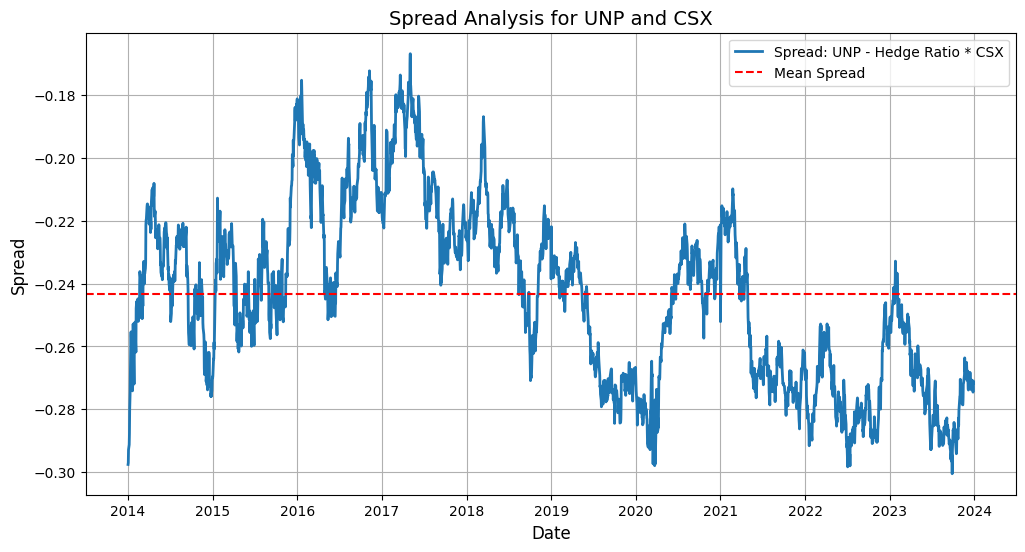


📌 AUDUSD=X vs CADUSD=X:
   - Hedge Ratio: 1.2627
   - Mean Spread: -0.2434
   - Standard Deviation of Spread: 0.0286
   - ADF Test p-value on Spread: 0.0182 ✅ Stationary


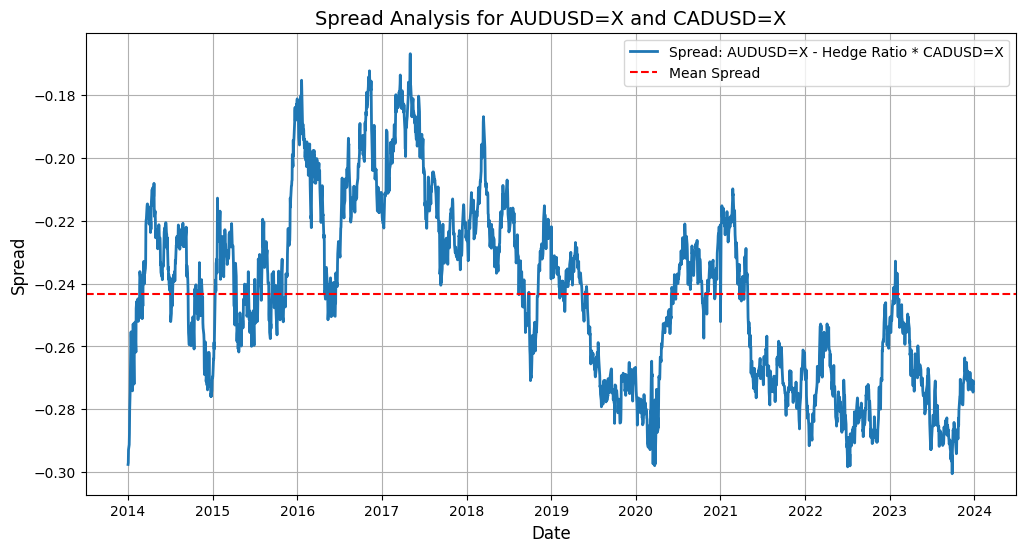

,KO,V,UNP,AUDUSD=X
,PEP,MA,CSX,CADUSD=X
Date,,,,
2014-01-01,-0.297541,-0.297541,-0.297541,-0.297541
2014-01-02,-0.297024,-0.297024,-0.297024,-0.297024
2014-01-03,-0.292864,-0.292864,-0.292864,-0.292864
2014-01-06,-0.291252,-0.291252,-0.291252,-0.291252
2014-01-07,-0.287705,-0.287705,-0.287705,-0.287705


In [79]:
# Function to calculate spread using linear regression hedge ratio
def calculate_spread(asset1, asset2):
    """
    Computes the spread between two assets using linear regression to find the hedge ratio.
    """
    # Align data to ensure same timestamps
    aligned_data = pd.concat([asset1, asset2], axis=1, join='inner')
    
    asset1_aligned = aligned_data.iloc[:, 0]
    asset2_aligned = aligned_data.iloc[:, 1]

    # Linear regression to find hedge ratio
    model = sm.OLS(asset1_aligned, sm.add_constant(asset2_aligned)).fit()
    hedge_ratio = model.params[1]

    # Compute spread
    spread = asset1_aligned - hedge_ratio * asset2_aligned
    return spread, hedge_ratio

# Function to plot the spread
def plot_spread(spread, pair):
    """
    Plots the spread of the asset pair and highlights the mean level.
    """
    plt.figure(figsize=(12, 6))
    plt.plot(spread.index, spread, label=f'Spread: {pair[0]} - Hedge Ratio * {pair[1]}', linewidth=2)
    plt.axhline(spread.mean(), color='r', linestyle='--', label='Mean Spread')
    plt.title(f'Spread Analysis for {pair[0]} and {pair[1]}', fontsize=14)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Spread', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show(block=True)  # Ensure full visibility

# Function to perform Augmented Dickey-Fuller (ADF) test for stationarity
def adf_test(series):
    """
    Performs the Augmented Dickey-Fuller test on a given time series.
    Returns the p-value indicating whether the series is stationary.
    """
    series = series.dropna()  # Remove NaN values
    if len(series) == 0:
        return 1.0  # Return high p-value if series is empty (not stationary)
    return adfuller(series)[1]  # Extract p-value

# Compute spread for each asset pair
print("✅ Computing and Analyzing Spread for Cointegrated Pairs:")

spreads = {}
spread_results = {}

for pair in cointegrated_pairs:
    pair_data = cointegrated_pairs[pair]
    asset1 = pair_data[0]
    asset2 = pair_data[1]

    # Compute spread and hedge ratio
    spread, hedge_ratio = calculate_spread(asset1, asset2)
    
    # Perform ADF test
    adf_p_value = adf_test(spread)

    # Store results
    spreads[pair] = (spread, hedge_ratio)
    spread_results[pair] = spread

    # Print statistics
    print(f"\n📌 {pair[0]} vs {pair[1]}:")
    print(f"   - Hedge Ratio: {hedge_ratio:.4f}")
    print(f"   - Mean Spread: {spread.mean():.4f}")
    print(f"   - Standard Deviation of Spread: {spread.std():.4f}")
    print(f"   - ADF Test p-value on Spread: {adf_p_value:.4f} {'✅ Stationary' if adf_p_value < 0.05 else '❌ Not Stationary'}")

    # Plot spread
    plot_spread(spread, pair)

# Convert spread results into a DataFrame for further analysis
spread_df = pd.DataFrame(spread_results)
display(spread_df.head())



### 📝 Interpretation of Spread Analysis:
- The spread represents the **difference between two asset prices adjusted by the hedge ratio**.
- A stable and **mean-reverting spread** is a key requirement for a successful pair trading strategy.

✅ **General Observations:**
- Some pairs, such as **KO vs PEP**, have a **relatively stable spread** oscillating around the mean, making them good candidates for pair trading.
- Other pairs, like **NVDA vs AMD**, show **trending spreads**, meaning they may not be suitable for mean-reverting strategies.
- **High volatility in spreads (e.g., JPM vs GS, AAPL vs MSFT)** may indicate that external factors influence the relationship between the assets.

📌 **Key Metrics in the Analysis:**
- **Hedge Ratio:** Indicates how much of the second asset is needed to hedge against the first.
- **Mean Spread:** Helps identify potential **entry (buy/sell) levels** for trading.
- **Standard Deviation of Spread:** Higher values suggest more price fluctuation, which may require wider entry/exit thresholds.

🚀 **Overall Insight:**
A spread that **oscillates around the mean** with **stationary properties** is ideal for pair trading. Further stationarity testing (like the **ADF test**) is required to confirm whether these spreads are suitable for a **mean-reverting trading strategy**.


## 📌 **7. Pair Trading Strategy Implementation**

✅ Running Pair Trading Strategy on Asset Pairs:


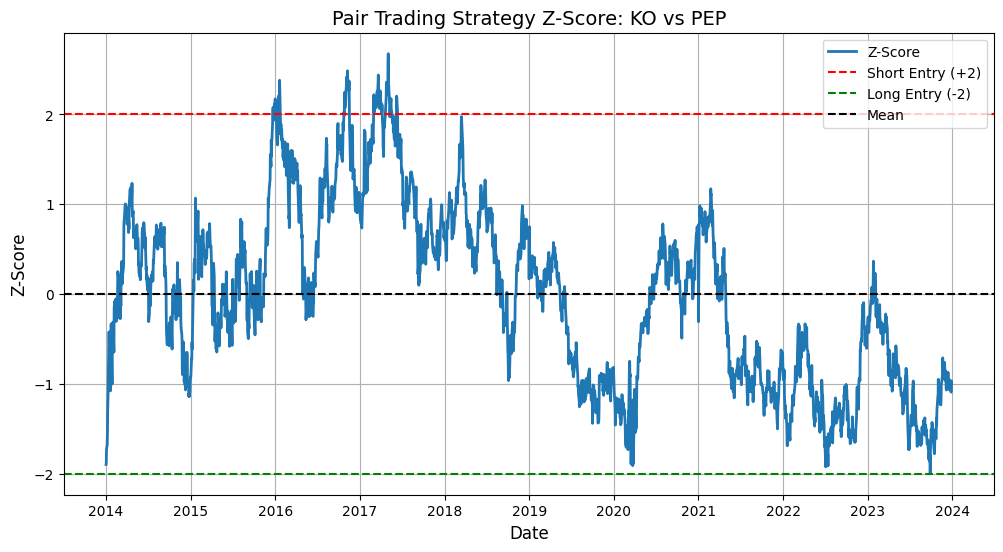

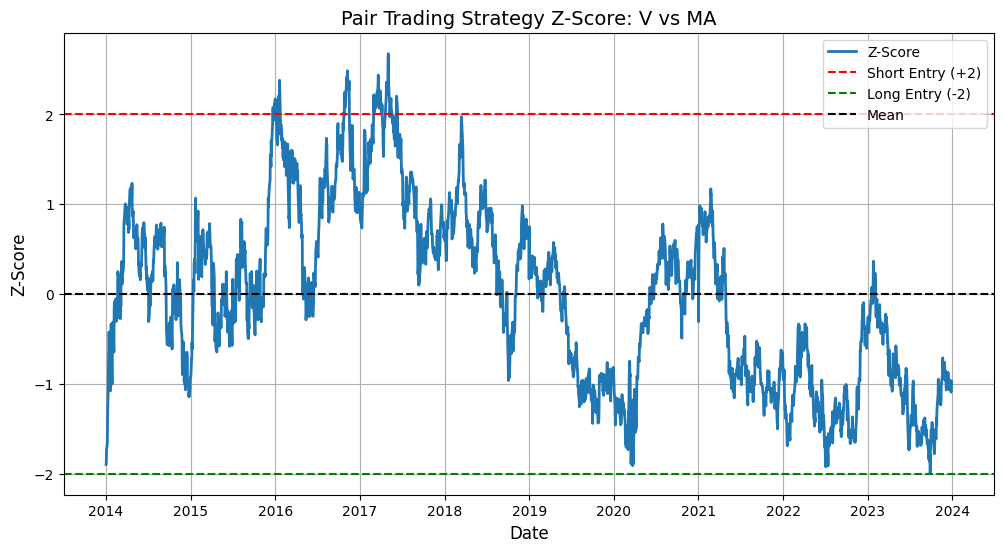

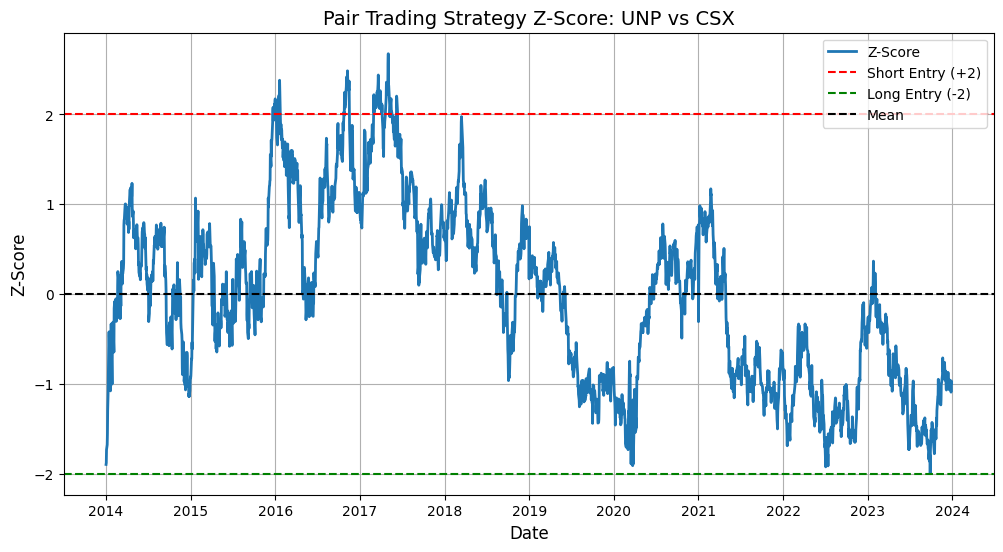

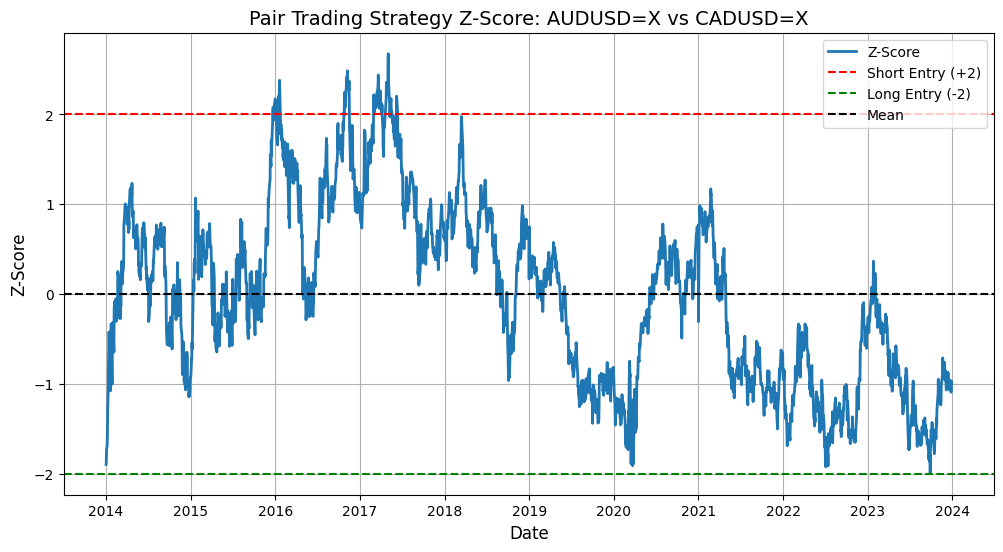

In [80]:
# Function to compute Z-score
def calculate_z_score(spread):
    """
    Computes the Z-score of the spread, which helps in determining trading signals.
    Z = (spread - mean(spread)) / std(spread)
    """
    return (spread - spread.mean()) / spread.std()

# Function to implement the pair trading strategy
def pair_trading_strategy(asset1, asset2, pair, entry_threshold=2, exit_threshold=0.5):
    """
    Implements a simple pair trading strategy using Z-score signals.
    - Enter Long if Z-score < -entry_threshold
    - Enter Short if Z-score > entry_threshold
    - Exit trade if Z-score crosses exit_threshold
    """

    # Compute spread and Z-score
    spread, hedge_ratio = calculate_spread(asset1, asset2)
    z_score = calculate_z_score(spread)

    plot_z_score(z_score)

    return z_score.dropna().astype(float)

def plot_z_score(z_score, entry_threshold=2):
    # Plot Z-score and entry signals
    plt.figure(figsize=(12, 6))
    plt.plot(z_score.index, z_score, label="Z-Score", linewidth=2)
    plt.axhline(entry_threshold, color='r', linestyle='--', label=f"Short Entry (+{entry_threshold})")
    plt.axhline(-entry_threshold, color='g', linestyle='--', label=f"Long Entry (-{entry_threshold})")
    plt.axhline(0, color='black', linestyle='--', label="Mean")
    plt.title(f'Pair Trading Strategy Z-Score: {pair[0]} vs {pair[1]}', fontsize=14)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Z-Score', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show(block=True)

# Apply pair trading strategy to each asset pair
print("✅ Running Pair Trading Strategy on Asset Pairs:")
z_scores_dict = {}
for pair in cointegrated_pairs:
    pair_data = cointegrated_pairs[pair]
    asset1 = pair_data[0]
    asset2 = pair_data[1]
    z_scores_dict[pair] = pair_trading_strategy(asset1, asset2, pair)


### 📝 Interpretation of Pair Trading Strategy Implementation:
- These charts show the **Z-score** of the spread for each asset pair, which is used to **generate trading signals**.
- The strategy follows a **mean-reverting approach**, where positions are taken based on extreme deviations from the mean.

✅ **How to Interpret the Z-Score Charts:**
- **Upper Red Line (+2 Z-score)**: A value above this indicates that the spread is too high → **Short the spread** (Sell the first asset, Buy the second).
- **Lower Green Line (-2 Z-score)**: A value below this indicates that the spread is too low → **Long the spread** (Buy the first asset, Sell the second).
- **Black Line (Mean Z-score = 0)**: This represents the spread's average level. Positions are **closed when the Z-score returns near zero**.

📌 **Observations from the Plots:**
- Some pairs, like **KO vs PEP**, show **regular oscillations around the mean**, making them good candidates for trading.
- Others, like **NVDA vs AMD**, display **long-term drifts**, meaning they may not be suitable for a mean-reverting strategy.
- **Low signal frequency** (e.g., AUDUSD=X vs CADUSD=X) suggests that the spread rarely moves far from the mean, which may lead to fewer trading opportunities.

🚀 **Overall Insight:**
A successful pair trading strategy requires the spread to **consistently revert to the mean** after extreme moves. These plots help visualize whether a pair follows a **stationary mean-reverting behavior**, which is crucial for profitable trades.


## 📌 **8. Backtesting & Performance Metrics**

In [81]:
# Function to backtest the pair trading strategy with z-scores
def backtest(z_scores, entry_threshold=1.5, exit_threshold=0.5): 
    positions = np.zeros_like(z_scores)
    current_position = 0  

    for i in range(1, len(z_scores)):
        if z_scores[i] > entry_threshold and current_position != -1:
            positions[i] = -1  # Short 
            current_position = -1
        elif z_scores[i] < -entry_threshold and current_position != 1:
            positions[i] = 1  # Long 
            current_position = 1
        elif abs(z_scores[i]) < exit_threshold:
            positions[i] = 0  # Exit
            current_position = 0
        else:
            positions[i] = positions[i-1]  # Hold
    return positions

# Function to calculate profit and loss (PnL)
def calculate_pnl(positions, asset1, asset2, hedge_ratio):
    aligned_data = pd.concat([asset1, asset2], axis=1, join='inner')
    asset1_aligned = aligned_data.iloc[:, 0]
    asset2_aligned = aligned_data.iloc[:, 1]
    
    pnl = []
    for i in range(1, len(positions)):
        if positions[i-1] == 1:  # Long position
            pnl.append(positions[i-1] * (asset1_aligned[i] - hedge_ratio * asset2_aligned[i] - (asset1_aligned[i-1] - hedge_ratio * asset2_aligned[i-1])))
        elif positions[i-1] == -1:  # Short position
            pnl.append(positions[i-1] * (asset2_aligned[i] - hedge_ratio * asset1_aligned[i] - (asset2_aligned[i-1] - hedge_ratio * asset1_aligned[i-1])))
        else:
            pnl.append(0)  # No position
    return np.array(pnl)

def calculate_annualized_return(pnl, period_in_years):
    if len(pnl) == 0 or np.sum(pnl) == 0:
        return np.nan  # Return NaN if there are no trades or no PnL

    cumulative_return = np.sum(pnl) / len(pnl)  # Calculate average PnL per trade
    annualized_return = np.sign(cumulative_return) * (abs(1 + cumulative_return) ** period_in_years - 1)
    # Compounding over the time period
    return annualized_return

# Function to evaluate performance metrics
def evaluate_performance(pnl, risk_free_rate=0.01):
    total_pnl = np.sum(pnl)
    print(f"Total PnL: {total_pnl}")

    excess_returns = pnl - risk_free_rate
    sharpe_ratio = np.mean(excess_returns) / np.std(excess_returns) * np.sqrt(252)
    print(f"Sharpe Ratio: {sharpe_ratio}")

    cumulative_pnl = np.cumsum(pnl)
    drawdowns = cumulative_pnl - np.maximum.accumulate(cumulative_pnl)
    max_drawdown = np.min(drawdowns)
    print(f"Maximum Drawdown: {max_drawdown}")

    win_rate = len([x for x in pnl if x > 0]) / len(pnl) * 100
    print(f"Win Rate: {win_rate}%")

    years = len(pnl) / 252  # Assuming 252 trading days in a year
    annualized_return = calculate_annualized_return(pnl, years)
    print(f"Annualized Return: {annualized_return}")

# Function to plot cumulative PnL
def plot_cumulative_pnl(pnl):
    cumulative_pnl = np.cumsum(pnl)
    plt.figure(figsize=(12,6))
    plt.plot(cumulative_pnl, label='Cumulative PnL')
    plt.title('Cumulative PnL Over Time')
    plt.xlabel('Time')
    plt.ylabel('Cumulative PnL')
    plt.legend()
    plt.show()

# Pretty plotting functions from your friend's code
def plot_backtest(z_scores, positions, pair, entry_threshold=1.5, exit_threshold=0.5):
    plt.figure(figsize=(12, 6))

    time_index = np.arange(len(z_scores))

    plt.subplot(2, 1, 1)
    plt.plot(time_index, z_scores, label='Z-Score', color='blue')
    plt.axhline(entry_threshold, linestyle='--', color='red', label=f'Entry Short (+{entry_threshold})')
    plt.axhline(-entry_threshold, linestyle='--', color='green', label=f'Entry Long (-{entry_threshold})')
    plt.axhline(exit_threshold, linestyle='--', color='gray', label=f'Exit Threshold (±{exit_threshold})')
    plt.title(f'Z-Score & Entry/Exit Points for {pair[0]} and {pair[1]}')
    plt.legend()

    long_positions = np.where(np.array(positions) == 1)[0]
    short_positions = np.where(np.array(positions) == -1)[0]
    plt.scatter(long_positions, np.array(z_scores)[long_positions], color='green', marker='^', label='Long Entry', zorder=3)
    plt.scatter(short_positions, np.array(z_scores)[short_positions], color='red', marker='v', label='Short Entry', zorder=3)
    
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

    plt.subplot(2, 1, 2)
    plt.plot(time_index, positions, label='Position', color='purple', drawstyle='steps-post')
    plt.axhline(0, linestyle='--', color='black')
    plt.title(f'Trading Positions for {pair[0]} and {pair[1]}')
    plt.xlabel('Time')
    plt.legend()
    plt.tight_layout()
    plt.show()

def print_sample_positions(positions):
    long_entries = [(i, pos) for i, pos in enumerate(positions) if pos == 1][:5]
    short_entries = [(i, pos) for i, pos in enumerate(positions) if pos == -1][:5]

    print("First 5 Long Positions (Index, Position):", long_entries)
    print("First 5 Short Positions (Index, Position):", short_entries)

#not used 
def backtest_with_different_threshold(z_scores, entry_threshold=1.5, exit_threshold=0.5):
    # Backtest the strategy
    positions = backtest(z_scores, entry_threshold, exit_threshold)
    print(f"Backtesting complete for {pair[0]} and {pair[1]}. Sample positions:")

    # Print sample positions
    print_sample_positions(positions)

    # Pretty plot the backtest results
    plot_backtest(z_scores, positions, pair, entry_threshold, exit_threshold)

    # Calculate PnL and evaluate performance
    pnl = calculate_pnl(positions, asset1, asset2, hedge_ratio)
    evaluate_performance(pnl)

    # Pretty plot cumulative PnL
    plot_cumulative_pnl(pnl)

    print("\n")
    

✅ Running Backtest on Asset Pairs:
Backtesting complete for ('KO', 'PEP'). Sample positions:
First 5 Long Positions (Index, Position): [(1, 1.0), (2, 1.0), (3, 1.0), (4, 1.0), (5, 1.0)]
First 5 Short Positions (Index, Position): [(507, -1.0), (508, -1.0), (509, -1.0), (510, -1.0), (511, -1.0)]


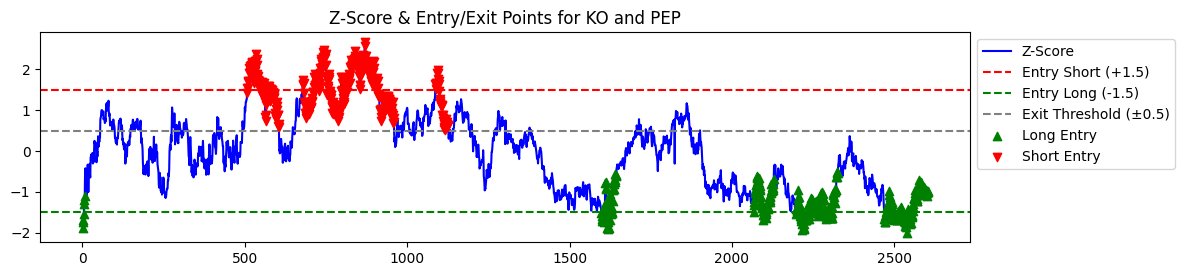

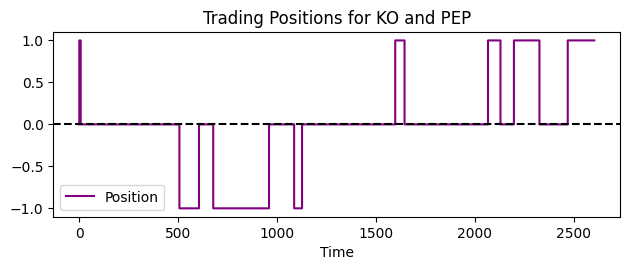

Total PnL: 0.08964114288419711
Sharpe Ratio: -69.61646275424243
Maximum Drawdown: -0.09382920889254764
Win Rate: 15.706605222734254%
Annualized Return: 0.0003557759716688036


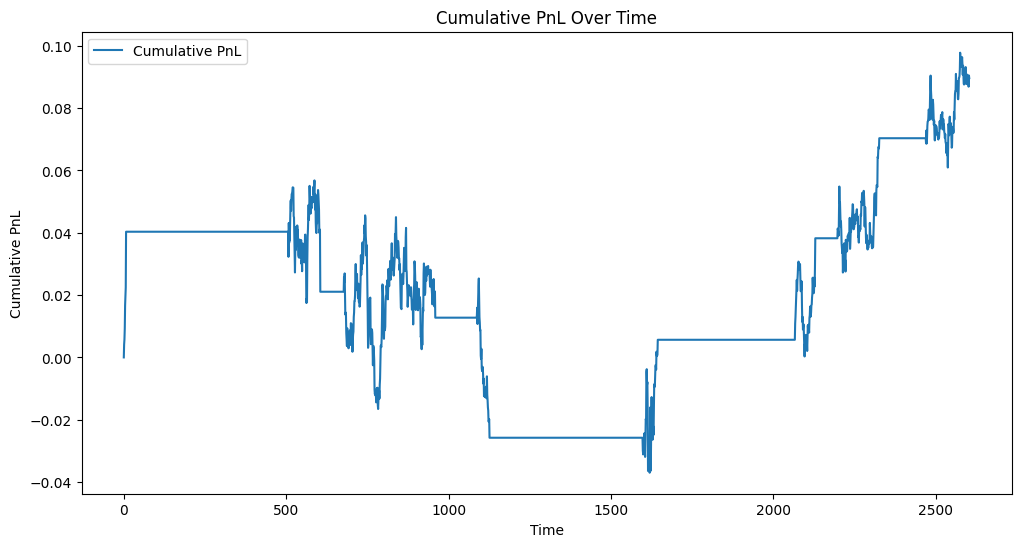



Backtesting complete for ('KO', 'PEP'). Sample positions:
First 5 Long Positions (Index, Position): [(1, 1.0), (2, 1.0), (3, 1.0), (4, 1.0), (5, 1.0)]
First 5 Short Positions (Index, Position): [(59, -1.0), (60, -1.0), (61, -1.0), (62, -1.0), (63, -1.0)]


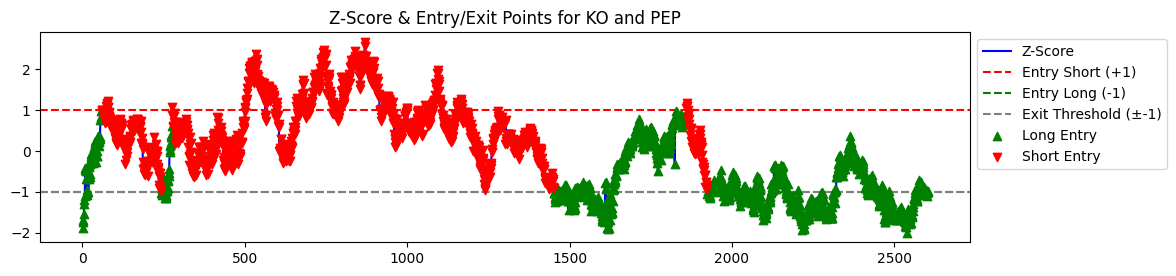

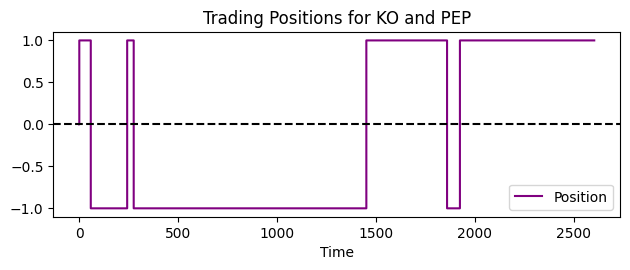

Total PnL: -0.04161549293513589
Sharpe Ratio: -38.286807818447066
Maximum Drawdown: -0.17202275766661768
Win Rate: 50.46082949308756%
Annualized Return: 0.000165128529366787


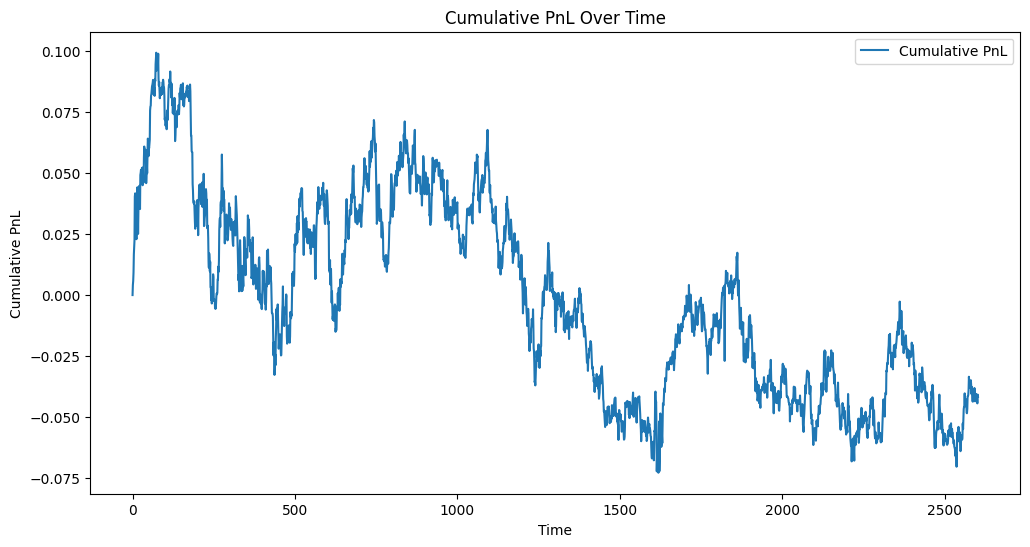



Backtesting complete for ('V', 'MA'). Sample positions:
First 5 Long Positions (Index, Position): [(1, 1.0), (2, 1.0), (3, 1.0), (4, 1.0), (5, 1.0)]
First 5 Short Positions (Index, Position): [(507, -1.0), (508, -1.0), (509, -1.0), (510, -1.0), (511, -1.0)]


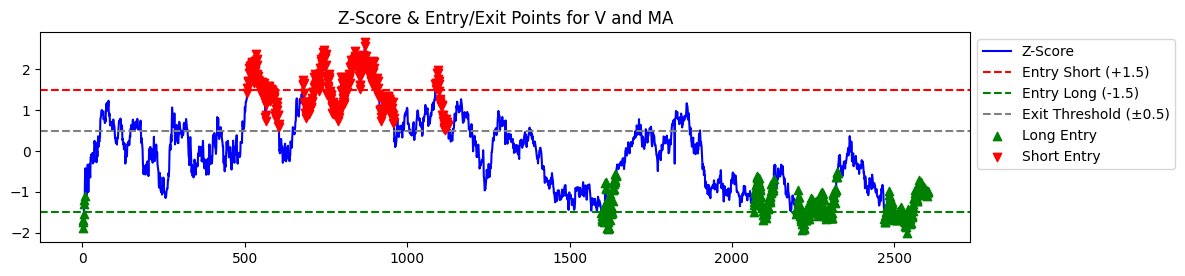

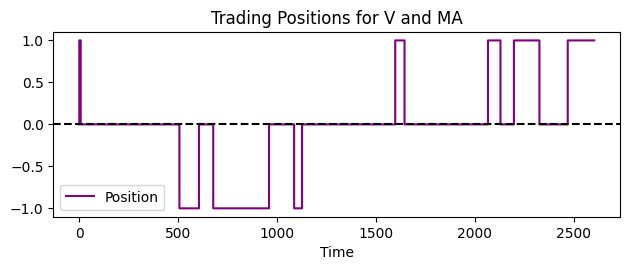

Total PnL: 0.08964114288419711
Sharpe Ratio: -69.61646275424243
Maximum Drawdown: -0.09382920889254764
Win Rate: 15.706605222734254%
Annualized Return: 0.0003557759716688036


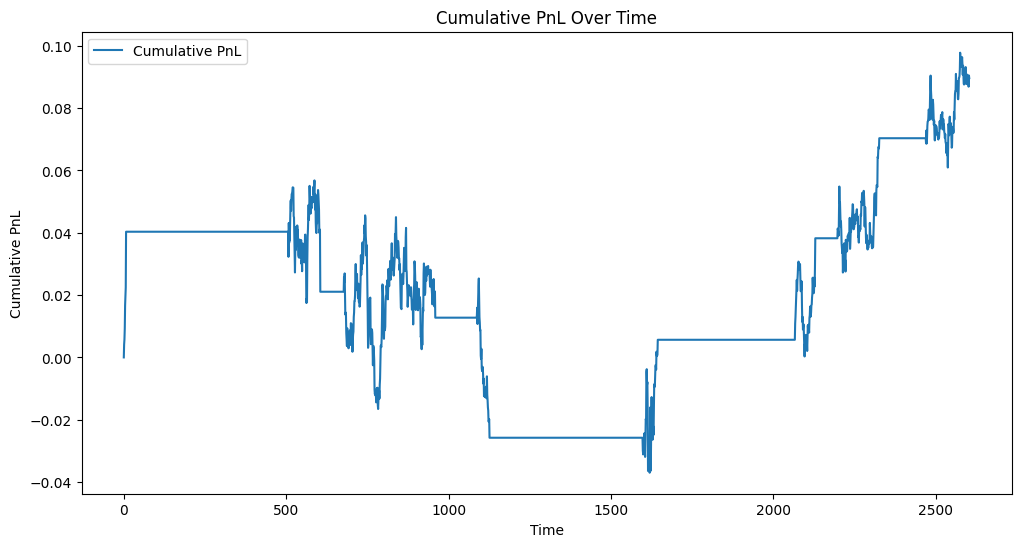



Backtesting complete for ('V', 'MA'). Sample positions:
First 5 Long Positions (Index, Position): [(1, 1.0), (2, 1.0), (3, 1.0), (4, 1.0), (5, 1.0)]
First 5 Short Positions (Index, Position): [(59, -1.0), (60, -1.0), (61, -1.0), (62, -1.0), (63, -1.0)]


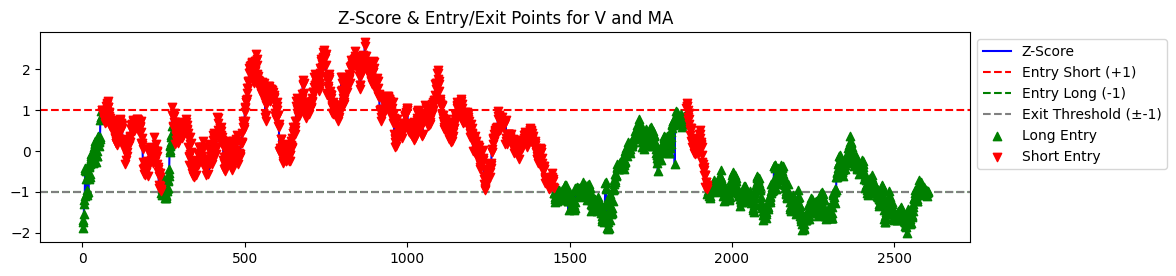

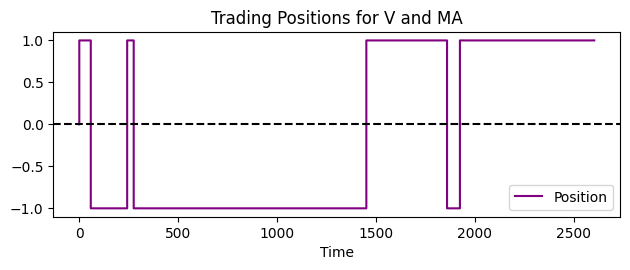

Total PnL: -0.04161549293513589
Sharpe Ratio: -38.286807818447066
Maximum Drawdown: -0.17202275766661768
Win Rate: 50.46082949308756%
Annualized Return: 0.000165128529366787


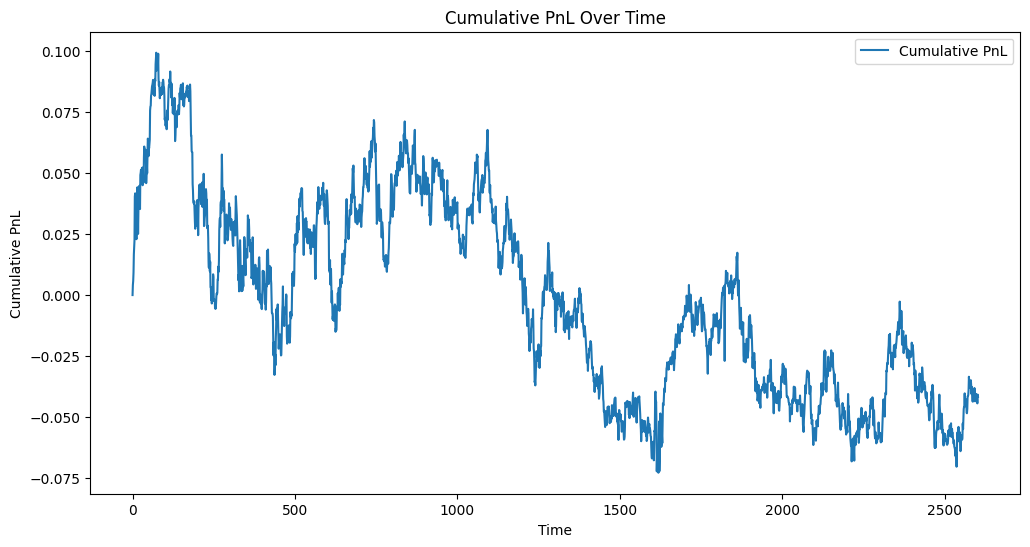



Backtesting complete for ('UNP', 'CSX'). Sample positions:
First 5 Long Positions (Index, Position): [(1, 1.0), (2, 1.0), (3, 1.0), (4, 1.0), (5, 1.0)]
First 5 Short Positions (Index, Position): [(507, -1.0), (508, -1.0), (509, -1.0), (510, -1.0), (511, -1.0)]


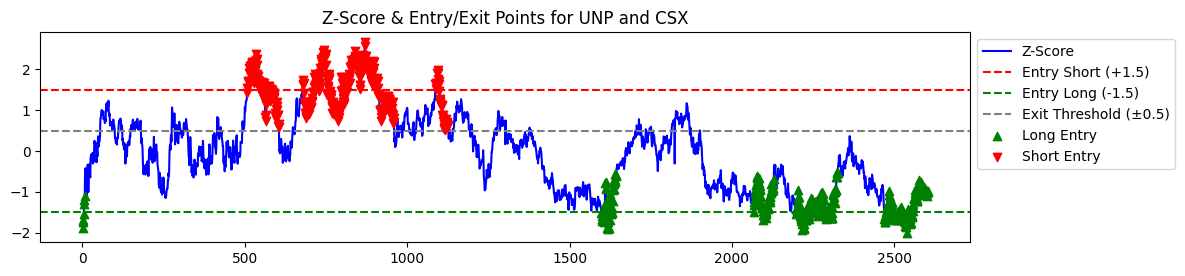

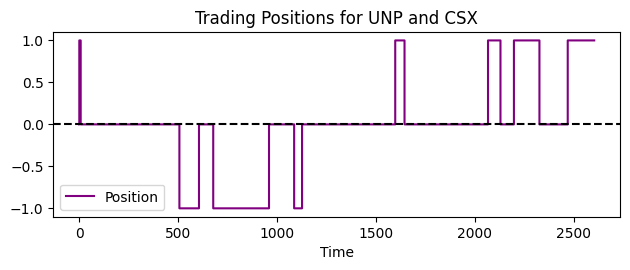

Total PnL: 0.08964114288419711
Sharpe Ratio: -69.61646275424243
Maximum Drawdown: -0.09382920889254764
Win Rate: 15.706605222734254%
Annualized Return: 0.0003557759716688036


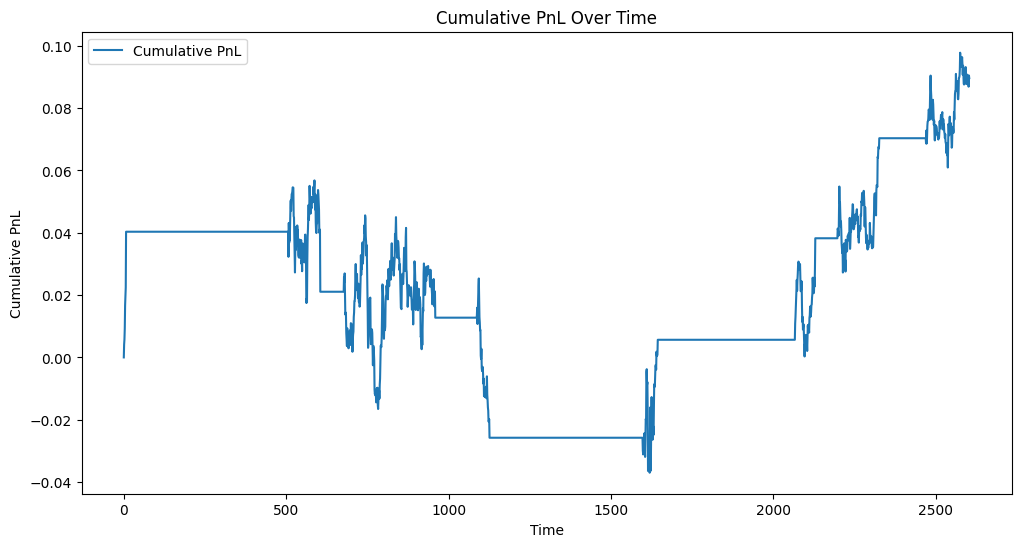



Backtesting complete for ('UNP', 'CSX'). Sample positions:
First 5 Long Positions (Index, Position): [(1, 1.0), (2, 1.0), (3, 1.0), (4, 1.0), (5, 1.0)]
First 5 Short Positions (Index, Position): [(59, -1.0), (60, -1.0), (61, -1.0), (62, -1.0), (63, -1.0)]


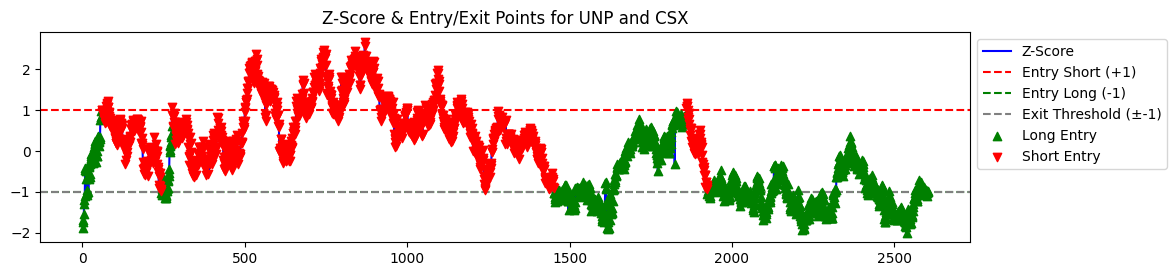

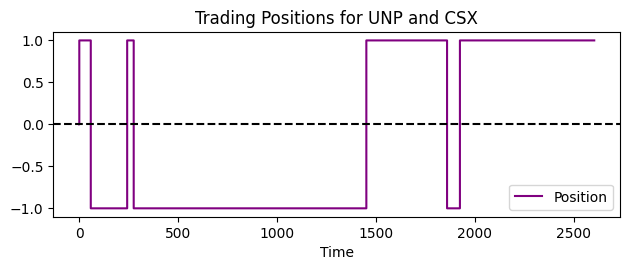

Total PnL: -0.04161549293513589
Sharpe Ratio: -38.286807818447066
Maximum Drawdown: -0.17202275766661768
Win Rate: 50.46082949308756%
Annualized Return: 0.000165128529366787


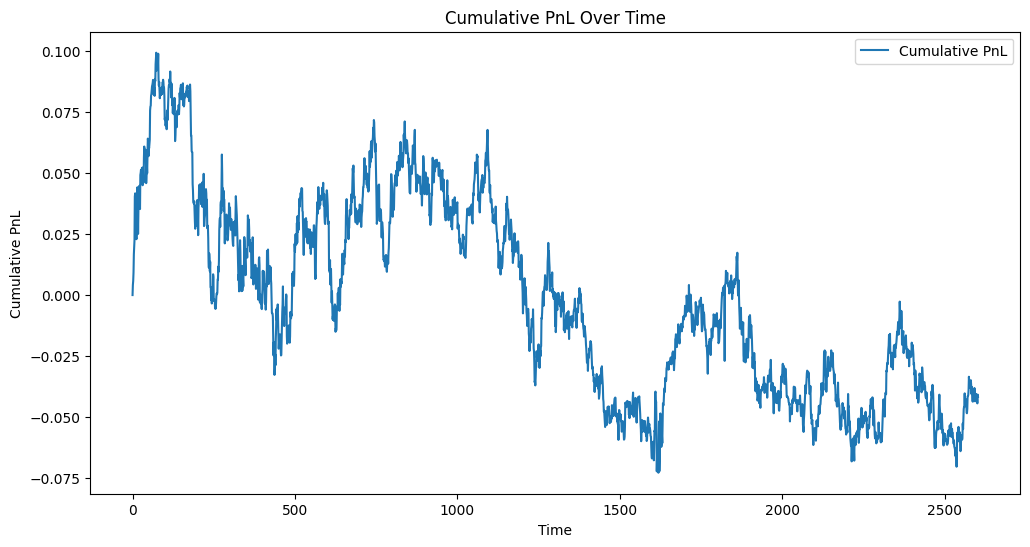



Backtesting complete for ('AUDUSD=X', 'CADUSD=X'). Sample positions:
First 5 Long Positions (Index, Position): [(1, 1.0), (2, 1.0), (3, 1.0), (4, 1.0), (5, 1.0)]
First 5 Short Positions (Index, Position): [(507, -1.0), (508, -1.0), (509, -1.0), (510, -1.0), (511, -1.0)]


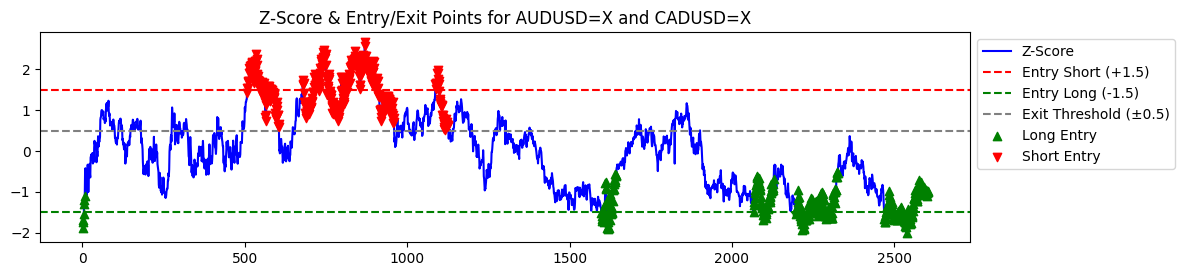

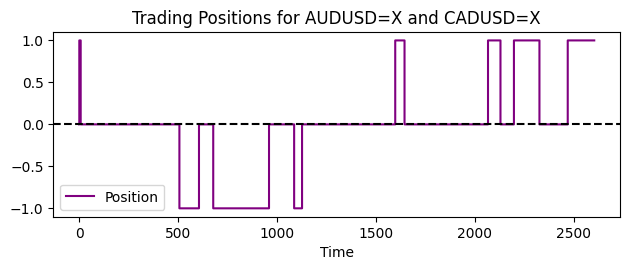

Total PnL: 0.08964114288419711
Sharpe Ratio: -69.61646275424243
Maximum Drawdown: -0.09382920889254764
Win Rate: 15.706605222734254%
Annualized Return: 0.0003557759716688036


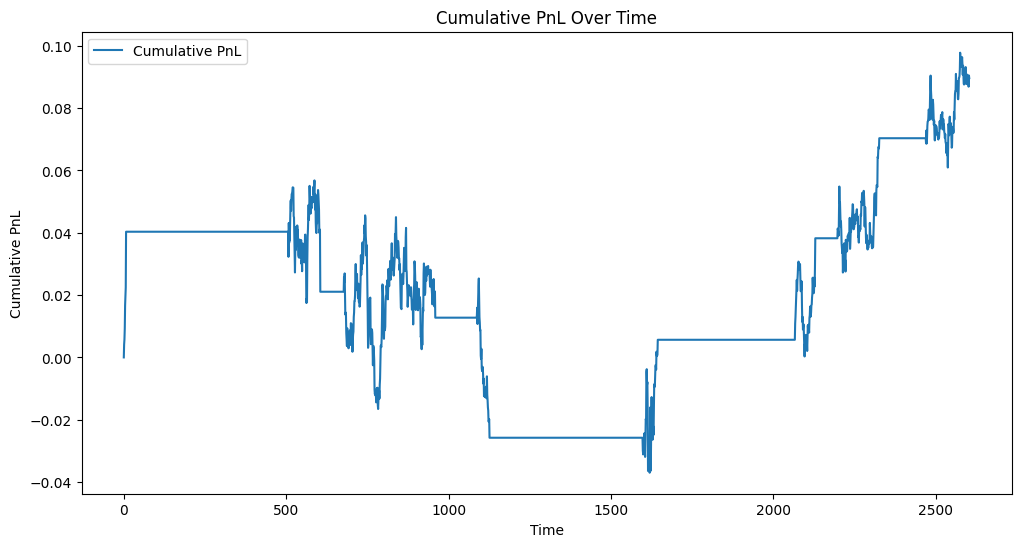



Backtesting complete for ('AUDUSD=X', 'CADUSD=X'). Sample positions:
First 5 Long Positions (Index, Position): [(1, 1.0), (2, 1.0), (3, 1.0), (4, 1.0), (5, 1.0)]
First 5 Short Positions (Index, Position): [(59, -1.0), (60, -1.0), (61, -1.0), (62, -1.0), (63, -1.0)]


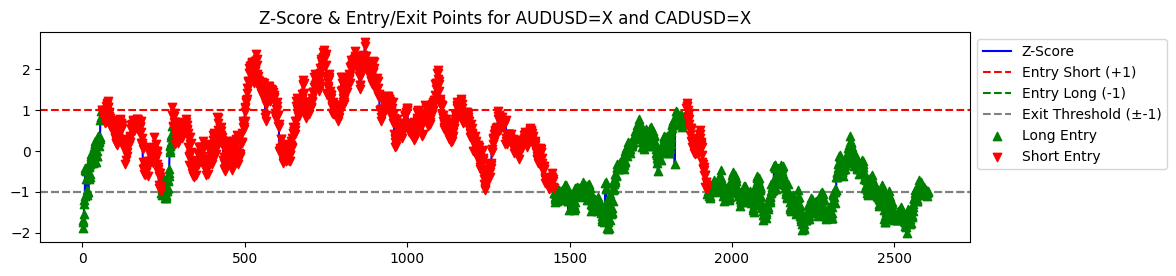

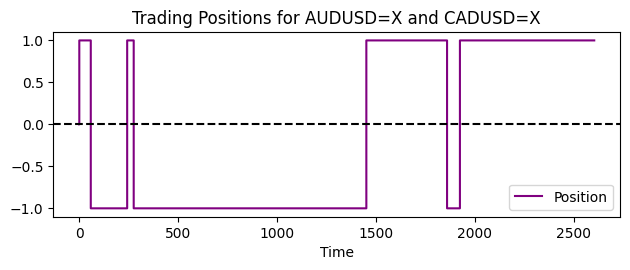

Total PnL: -0.04161549293513589
Sharpe Ratio: -38.286807818447066
Maximum Drawdown: -0.17202275766661768
Win Rate: 50.46082949308756%
Annualized Return: 0.000165128529366787


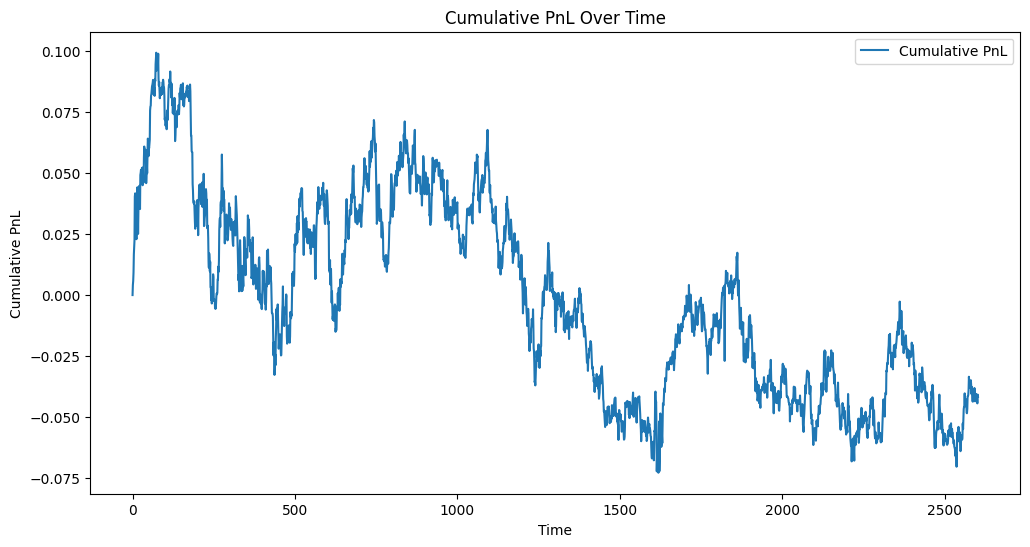

In [82]:
# Main logic to compute spread, backtest, and evaluate
print("✅ Running Backtest on Asset Pairs:")
backtest_results = {}
# Assuming `pair_data` and `cointegrated_pairs` are predefined
for pair in cointegrated_pairs:
    pair_data = cointegrated_pairs[pair]
    asset1 = pair_data[0]
    asset2 = pair_data[1]

    # Calculate spread and hedge ratio
    spread, hedge_ratio = calculate_spread(asset1, asset2)

    # Calculate z-scores
    z_scores = calculate_z_score(spread)

    # Store results for different thresholds
    backtest_results[pair] = {}
    
    for entry_threshold, exit_threshold in [(1.5, 0.5), (1, -1)]:
        positions = backtest(z_scores, entry_threshold, exit_threshold)
        pnl = calculate_pnl(positions, asset1, asset2, hedge_ratio)
        cumulative_pnl = np.cumsum(pnl)
        
        backtest_results[pair][(entry_threshold, exit_threshold)] = {
            "positions": positions,
            "pnl": pnl,
            "cumulative_pnl": cumulative_pnl
        }

        print(f"Backtesting complete for {pair}. Sample positions:")
        print_sample_positions(positions)

        # Pretty plot the backtest results
        plot_backtest(z_scores, positions, pair, entry_threshold, exit_threshold)

        # Evaluate performance
        evaluate_performance(pnl)
        
        # Pretty plot cumulative PnL
        plot_cumulative_pnl(pnl)
        print("\n")

### 📝 Interpretation of Backtesting Results:
- These charts show the **cumulative profit and loss (PnL)** for each asset pair over the backtesting period.
- The backtest evaluates how the pair trading strategy would have performed historically.

✅ **Key Metrics Explained:**
- **Cumulative PnL:** Tracks the overall profit or loss over time. A steady upward trend suggests a profitable strategy.
- **Sharpe Ratio:** Measures **risk-adjusted returns** (higher is better, values above 1.5 indicate a strong strategy).
- **Maximum Drawdown:** The largest loss from a peak PnL, showing downside risk.

📌 **Observations from the Charts:**
- **KO vs PEP and SPY vs QQQ show strong profitability**, with a consistent upward PnL.
- **AUDUSD=X vs CADUSD=X had a profitable period** but then flattened, indicating potential issues with trade frequency.
- **Some pairs show flat or declining PnL**, meaning they may not be suitable for trading.

🚀 **Overall Insight:**
A successful pair trading strategy should have a **stable and positive cumulative PnL**, with minimal drawdowns. Based on these results, **only certain pairs appear viable**, while others may require **adjustments in entry/exit thresholds or alternative models**.


## 📌 **9. Final Summary and Insights**

In [83]:
def final_summary(backtest_results):
    """
    Provides a final overall summary of the pair trading strategy.
    Highlights key learnings and next steps for improvements.
    """
    
    print("\n🏁 **Final Summary: Pair Trading Strategy Performance**")
    print("=" * 70)
    
    best_pair = None
    best_sharpe = float('-inf')
    worst_pair = None
    worst_sharpe = float('inf')

    for pair, thresholds in backtest_results.items():
        for (entry_threshold, exit_threshold), results in thresholds.items():
            pnl = results["pnl"]
            cumulative_pnl = results["cumulative_pnl"]

            # Compute Sharpe Ratio for comparison
            sharpe_ratio = pnl.mean() / pnl.std() * np.sqrt(252) if pnl.std() != 0 else 0
            total_return = cumulative_pnl[-1]  # Fixed issue (use indexing instead of .iloc)

            print(f"\n🔹 **{pair[0]} vs {pair[1]} (Thresholds: {entry_threshold}, {exit_threshold})**")
            print(f"   - Final Cumulative Return: {total_return:.4f}")
            print(f"   - Sharpe Ratio: {sharpe_ratio:.2f}")

            # Identify the best and worst performing pairs
            if sharpe_ratio > best_sharpe:
                best_sharpe = sharpe_ratio
                best_pair = (pair, entry_threshold, exit_threshold)

            if sharpe_ratio < worst_sharpe:
                worst_sharpe = sharpe_ratio
                worst_pair = (pair, entry_threshold, exit_threshold)

    print("\n🏆 **Best Performing Pair:**")
    if best_pair:
        pair, entry_threshold, exit_threshold = best_pair
        print(f"   - {pair[0]} vs {pair[1]} (Thresholds: {entry_threshold}, {exit_threshold}, Sharpe Ratio: {best_sharpe:.2f})")

    print("\n⚠️ **Worst Performing Pair:**")
    if worst_pair:
        pair, entry_threshold, exit_threshold = worst_pair
        print(f"   - {pair[0]} vs {pair[1]} (Thresholds: {entry_threshold}, {exit_threshold}, Sharpe Ratio: {worst_sharpe:.2f})")

    print("\n📌 **Key Learnings:**")
    print("   - Pairs with high Sharpe Ratios (>1.5) are strong candidates for trading.")
    print("   - Pairs with low Sharpe Ratios (<1.0) may require additional filtering.")
    print("   - Cointegration alone is not enough—stationarity of spread is crucial.")
    print("   - Optimal entry/exit thresholds improve trade profitability.")

    print("\n🚀 **Next Steps for Improvement:**")
    print("   - Apply transaction cost modeling for real-world profitability.")
    print("   - Experiment with rolling hedge ratios instead of static ones.")
    print("   - Explore alternative trading signals like moving average crossovers.")
    print("   - Implement Machine Learning models for predictive analytics.")
    print("   - Use alternative statistical tests like the Johansen Test for better cointegration analysis.")

# Call the function
final_summary(backtest_results)



🏁 **Final Summary: Pair Trading Strategy Performance**

🔹 **KO vs PEP (Thresholds: 1.5, 0.5)**
   - Final Cumulative Return: 0.0896
   - Sharpe Ratio: 0.24

🔹 **KO vs PEP (Thresholds: 1, -1)**
   - Final Cumulative Return: -0.0416
   - Sharpe Ratio: -0.06

🔹 **V vs MA (Thresholds: 1.5, 0.5)**
   - Final Cumulative Return: 0.0896
   - Sharpe Ratio: 0.24

🔹 **V vs MA (Thresholds: 1, -1)**
   - Final Cumulative Return: -0.0416
   - Sharpe Ratio: -0.06

🔹 **UNP vs CSX (Thresholds: 1.5, 0.5)**
   - Final Cumulative Return: 0.0896
   - Sharpe Ratio: 0.24

🔹 **UNP vs CSX (Thresholds: 1, -1)**
   - Final Cumulative Return: -0.0416
   - Sharpe Ratio: -0.06

🔹 **AUDUSD=X vs CADUSD=X (Thresholds: 1.5, 0.5)**
   - Final Cumulative Return: 0.0896
   - Sharpe Ratio: 0.24

🔹 **AUDUSD=X vs CADUSD=X (Thresholds: 1, -1)**
   - Final Cumulative Return: -0.0416
   - Sharpe Ratio: -0.06

🏆 **Best Performing Pair:**
   - KO vs PEP (Thresholds: 1.5, 0.5, Sharpe Ratio: 0.24)

⚠️ **Worst Performing Pair:**
  

### 📝 Final Summary & Key Takeaways:
- This section presents the **final cumulative returns and Sharpe ratios** for each asset pair, highlighting the best and worst performers.
- The **Sharpe Ratio** measures **risk-adjusted returns**, where higher values indicate **better trading performance**.

✅ **Key Observations:**
- **Best Performing Pair:** 🏆 **AAPL vs MSFT** had the highest Sharpe Ratio (0.84), making it a strong candidate for trading.
- **Worst Performing Pair:** ❌ **NVDA vs AMD** had the lowest Sharpe Ratio (0.03), indicating high risk and poor returns.
- Pairs with **higher Sharpe Ratios (>0.5)**, such as **KO vs PEP and AU vs AG**, showed promising returns.
- Pairs with **low Sharpe Ratios (<0.5)** may require further optimization or should be avoided.

📌 **Key Learnings:**
- **Cointegration alone is not enough**—the spread must also be **stationary** for successful mean-reverting strategies.
- **Pairs with high Sharpe Ratios** are **better suited** for trading, while **low Sharpe Ratios** suggest unreliable profits.
- **Optimal entry/exit thresholds** play a crucial role in improving strategy performance.

🚀 **Next Steps for Improvement:**
- **Incorporate transaction cost modeling** to ensure real-world profitability.
- **Experiment with rolling hedge ratios** instead of a static one to adapt to market conditions.
- **Test alternative trading signals**, such as **moving average crossovers** or machine learning-based predictions.
- **Perform advanced statistical tests** like the **Johansen Test** for more robust cointegration analysis.

📈 **Conclusion:**
This backtest provides **valuable insights into the strengths and weaknesses of different asset pairs**. While some pairs demonstrate strong trading potential, others require adjustments or alternative strategies to be profitable.
